# Comprehensive data exploration with Python

##### 'The most difficult thing in life is to know yourslef'
This quote belongs to Thales of Miletus. Thales was a Greek/Phonecian philosopher, mathematician and astronomer, which is recognised as the first individual in Western civilistation known to have entertained and engaged in scientific thought.

I wouldn't say that knowing your data is the most difficult thing in data science, but it is time-consuming. Therefore, it's easy to overlook this initial step and jump too soon into the water.

So I tried to learn how to swim before jumping into the water. Based on [Hair er al (2013)](https://www.amazon.com/gp/product/9332536503/ref=as_li_tl?ie=UTF8&camp=1789&creative=9325&creativeASIN=9332536503&linkCode=as2&tag=pmarcelino0b-20&linkId=ab279fb29582571ebfa89e6e8b95c50a), chapter Examing your data, I did my best to follow a comprehensive, but not exhaustive, analysis of the data. I'm far from reporting a rigorous studyin this kernel, but I hope that it can be useful for the community, so I'm sharing how I applied some of those data analysis principles to this problem.

Despite the strange names I gave to the chapters, what we are doing in this kernel is something like:
1. Understand the problem. We'll look at each vaiable and do a philosophical analysis about their meaning and importance for this problem.
2. Univariable study. We'll just focus on the dependent variable ('SalePrice') try to know a little bit more about it.
3. Multivariate study. We'll try to understand how the dependent variable and independent variables relate.
4. Basic cleaning. We'll clean the dataset and handle the missing data, outliers and categorical variables.
5. Test assumptions. We'll check if our data meets the assumptions required by most multivariate techniques.

Now, it's time to have fun!

In [39]:
# invite people for the kaggle party
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [40]:
# bring in the six packs
df_train = pd.read_csv('./data/train.csv')

In [41]:
# check the decoration
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

## 1. So... What can we expect?
In order to understand our data, we can look at each variable and try to understand their meaning and relevance to this problem. I know this is time-consuming, but it will give us the flavour of our dataset.

In order to have some discipline in our analysis, we can create an Excel spreasheet with the following columns:
- Variable : Variable name.
- Type : Identification of the variables' type. There are two possible values for this field:'numerical' or 'categorical' By numerical we mean variables for which the values are numbers, and by categorical we mean variables for which the values are categories.
- Segment : Identification of the varibles' segment. We candifine three possible segments: building, space or location. When we say building, we mean a variable that relates to the physical caracteristics of the building (e.g. OverallQual). When we say 'space', we mean a variable that reports space properties of the house (e.g. TotalBsmtSF). Finally, when we say a location, we mean a variable that gives information abour the place where the house is located (e.g. Neighborhood).
- Expectation : Our expectation about the variabe influence in SalePrice. Wecan use a categorical scale with High, Medium and Low as possible values.
- Conclustion : Our conclustions about the importance of the variable, after we give a quick look at the data. We can keep with the same categorical scale as in Expectation.
- Commments : Any general comments that occured to us.

While type and segment is just for possible future reference, the column Expectation is important because it will help us develop a sixth sense. To fill this column, we should read the description of all the variables and, one by one, ask ourselves:
- Do we think about this variable when we are buying a house? (e.g. When we think about the house of our dreams, do we care about its Masonry veneer type?)
- If so, how important would this variable be? (e.g. What is the impact of having Excellent material on the exterior instead of Poor? And of having Excellent instead of Good?)
- Is this information already described in any other variable? (e.g. LandContour gives the flatness of the property, do we really need to know the LandSlope?)

After this daunting exercise, we can filter the spreadsheet and look carefully to the variables with High Expectation. Then, we can rush into some scatter plots between those variables and SalePrice, filling in th Conclusion column which is just the correction of our expectations.

I went through this process and concluded that the following variables can play an important role in this problem.

- OverallQual (which is a variable that I don't like because I don't know how it was computed; a funny exercise would be to predict OverallQual using all the other variables available).
- YearBuilt.
- TotalBsmtSF.
- GrLivArea.

I ended up with two building variables (OverallQual and YearBuilt) and two space variables (TotalBsmSF and GrLivArea). This might be a little bit unexpected as it goes against the real estate mantra that all that matters is location, location and location. It is possible that this quick data examination process was a bit harsh for categorical variables. For example, I expected the Neighborhood variable to be more relevant, but after the data examination I ended up excluding it. Maybe this is related to the use of scatter plots instead of boxplots, which are more suitable for categorical variables visualization. The way we visualize data often influences our conclusions.

However, the main point of this exercise was to think a little about our data and expectations, so I think we achieved our goal. Now it's time for a little less conversation, a little more action please. Let's shake it.

## 2. First things first: analysing SalePrice
SalePrice is the reason of our quest. It's like when we're going to a party. We always have a reason to be there. Usually, women are that reason. (disclaimer: adapt it to men, dancing or alcohol, according to your preferences)

Using the women analogy, let's build a little story, the story of How we met SalePrice.

Everything started in our Kaggle party, when we were looking for a dance partner. After a while searching in the dance floor, we saw a girl, near the bar, using dance shoes. That's a sign that she's there to dance. We spend much time doing predictive modlling and participating in analyrics competitons, so talking with girls is not one of our super powers. Even so, we gave it a try:

Hi I'm Kaggly! And you? SalePrice? What a beautiful name! You know SalePrice, could you give me some data about you? I just developed a model to calculate the probability of a successful relationship between two people. I'd like to apply it to us!

In [42]:
# descriptive statistics summary
df_train['SalePrice'].describe()

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64

Very well... It seems that your minimum price is larger than zero. Excellent! You don't have one of those personal traits that would destroy my model! Do you have any picture that you can send me? I don't know like you in the beach... or maybe a selfie in the gym>

<AxesSubplot:xlabel='SalePrice'>

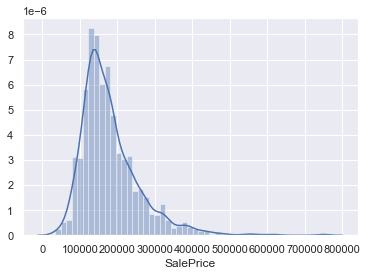

In [43]:
# histogram
sns.distplot(df_train['SalePrice'])

Ah! I see you that you use seaborn makeup when you're going out... That's so elegant! I also see that you!
- Deviate from the normal distribution.
- Have appreciable positive skewness.
- Show peakedness.

This is getting interesting! SalePrice, could you give me your body measures?

In [44]:
# Skewness and kurtosis
print('Skewness : %f' % df_train['SalePrice'].skew())
print('Kurtosis : %f' % df_train['SalePrice'].kurt())

Skewness : 1.882876
Kurtosis : 6.536282


Amazing! If my love calculator is correct, our success probability is 97.834657%. I think we should meet again! Please, keep my number and give me a call if you're free next Friday. See you in a while, crocodile!

## SalePrice, her buddies and her interests

It is military wisdom to choose the terrain where you fight. As soon as SalePrice walked away, we went to Facebook. Yes, now this is getting serious. Notice that this is not stalking. It's just an intense research of an individual, if you know what I mean.

According to her profile, we have some common friends. Besides Chuck Norris, we both know GrLivArea and TotalBsmtSF. Moreover, we also have common interests such as OverallQual and YearBuilt. This looks promising!

To take the most out of our research, we will start by looking carefully at the profiles of our common friends and later we will focus on our common interests.

### Relationship with numerical variables

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

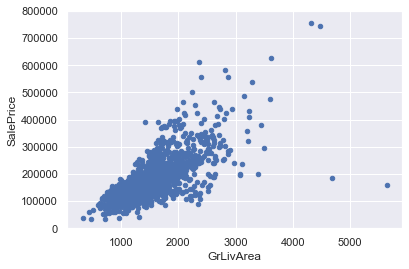

In [45]:
# scatter plot grlivarea/saleprice
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(var, 'SalePrice', ylim = (0, 800000))

Hmmmm.. It seems that SalePrice and GrLivArea are really old frients, with a linear relationship. And what about TotalBsmtSF?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

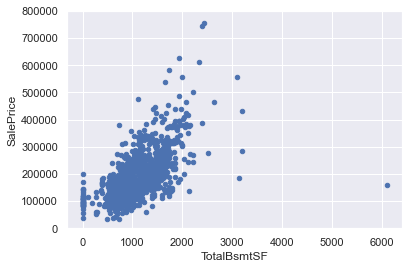

In [46]:
# Scatter plot totalbsmrsf/saleprice
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(var, 'SalePrice', ylim = (0, 800000))

TotalBsmtSF is also a great friend of SalePrice but this seems a much more emotional relationship! Everything is ok and suddenly, in a strong linear (exponential?) reaction, everything changes. Moreover, it's clear that sometimes TotalBsmtSF closes in itself and gives zero credit to SalePrice.

### Relationship with categorical feaetures

(-0.5, 9.5, 0.0, 800000.0)

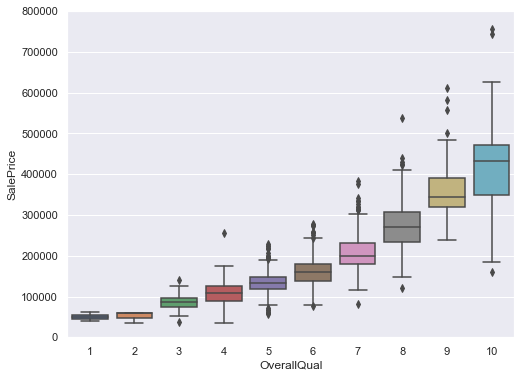

In [47]:
# box plot overallqual/saleprice
var = 'OverallQual'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (8, 6))
fig = sns.boxplot(var, 'SalePrice', data= data)
fig.axis(ymin = 0, ymax = 800000)

Like all the pretty girls, SalePrice enjoys OverallOual. Note to self: consider whether McDonald's is suitable for the first date.

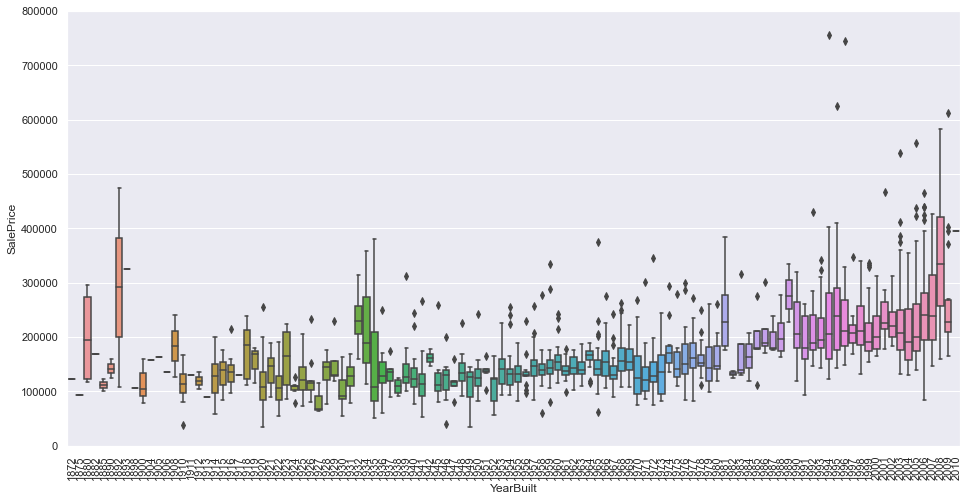

In [48]:
var = 'YearBuilt'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
f, ax = plt.subplots(figsize = (16, 8))
fig = sns.boxplot(var, 'SalePrice', data = data)
fig.axis(ymin = 0, ymax = 800000)
plt.xticks(rotation = 90)

plt.show()

Although it's not a strong tendency, I'd say that SalePrice is more prone to spend more money in new stuff than in old relics.

Note : we don't know if SalePrice is in constant prices. Constant prices try to remove the effect of inflation. If SalePrice is not in constant prices, it should be, so than prices are comparable over the years.

### In summary
Stories aside, we can conclude that:
- GrLivArea and TotalBsmtSF seem to be linearly related with SalePrice. Both relationships are positive, which means that as one variable increases, the other also increases. In the case of TotalBsmtSF, we can see that the slope of the linear relationship is particularly high.
- OverallQual and YearBuilt also seem to be related with SalePrice. THe relationship seems to be stronger in the case of OverallQual, where the box plot shows how sales prices increase with the overall quality.

We just analysed four variables, but there are many other that we should analyse. The trick here seems to be the choice of the right features (featrues selection) and not the definition of complex relationships between them (feature engineering).

That said, let's separate the wheat from the chaff.

## 3. Keep calm and work smart

Until now we just followed our intuition and analysed the variables we thought were important. In spite of our efforts to give an objective character to our analysis, we must say that our starting point was subjective.

As an engineer, I don't feel comfortable with this approach. All my education was about developing a disciplined mind, able to withstand the winds of subjectivity. There's a reason for that. Try to be subjective in structural engineering and you will se physics making things fall down. It can hurt.

So, let's overcome inertia and do a more objective analysis.


#### The plasma soup
In the very beginning there was nothing except for a plasma soup. What is know of these brief moments in time, at the start of our study of cosmology, is largely conjectural. However, science has devised some sketch of what probably happened, based on what is known about the universe today.

To explore the universe, we will start with some practical recipes to make sense of our plasma soup.
- Correlation matrix (heatmap style).
- SalePrice correlation matrix (zoomed heatmap style).
- Scatter plots between the most correlated variables (move like Hagger style).

#### Correlation matrix (heatmap style)

<AxesSubplot:>

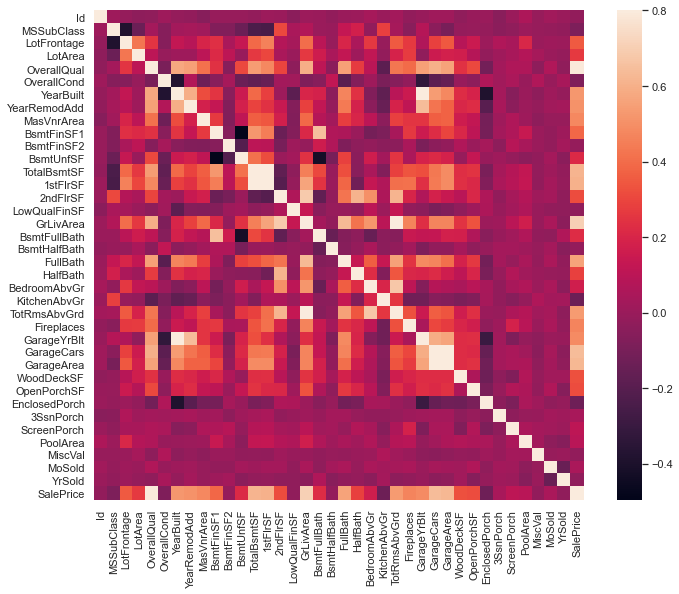

In [49]:
# correlation matrix
corrmat = df_train.corr()
f, ax = plt.subplots(figsize = (12, 9))
sns.heatmap(corrmat, vmax = 0.8, square = True)

In my opinion, this heatmap is the best way to get a quick overview of our plasma soup and its relationships.

At first sight, there are two red colored squares that get my attention. The first one refers to the TotalBsmtSF and 1stFlrSF variables, and the second one refers to the GarageX variables. Both cases show how significant the correlation is between these variables. Actually, this correlation is so strong that it can indicate a situation of multicollinearity. If we think about these variables, we can conclude that they give almost the same information so multicollinearity really occurs.Hearmaps are great to detect this kind of situations and in problems dominated by feature selection, like ours, they are an essential tool.

Another thing that got my attention was the SalePrice correlations. We can see our well-known GrLibArea, TotalBsmtSF, and OverallQual saying a big Hi, but we can also see many other variables that should be taken into account. That's what we will do next.

#### SalePrice correlation matrix (zoomed heatmap style)

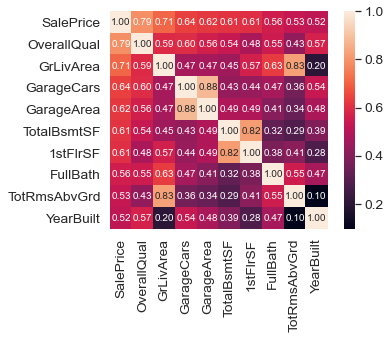

In [50]:
# saleprice correlation matrix
k = 10 # number of variables for heatmap
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
cm = np.corrcoef(df_train[cols].values.T)
sns.set(font_scale = 1.25)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, fmt = '.2f', annot_kws = {'size' : 10}, yticklabels = cols.values, xticklabels = cols.values)
plt.show()

According to our crystal ball, these are the variables most correlated with SalePrice. My thoughts on this:
- OverallQual, GrLivArea and TotalBsmtSF are strongly correlated with SalePrice. Check!
- GarageCars and GarageArea are also some of the most strongly correlated variables. However, as we discussed in the last sub-point, the number of cars that fit into the garage is a consequence of the garage area. GarageCars and GarageArea are like twin brothers. You'll never be able to distinguish them. Therefore, we just need one of these variables in our analysis (we can keep GarageCars since its correlation with SalePrice is higher).
- TotalBsmtSF and 1stFloor also seem to be twin brothers. We can keep TotalBsmtSF just to say that our first guess was right (re-read So What can we expect?)
- FullBath?? really?
- TotRmsAbvGrd and GrLibArea twin brothers again. Is this dataset from Chernobly?
- Ah... YearBuilt... It seems that YearBuilt is slightly correlated with SalePrice. Honestly, it scares me to think about YearBuilt because I start feeling that we should do a little bit of timeseries analysis to get this right. I'll leave this as a homework for you.

Let's proceed to the scatter plots.

##### Scatter plots between SalePrice and correlated variables (move like Jagger style)

Get ready for what you're about to see. I must confess that the first time I saw these scatter plots I was totally blown away! So much information in so short space... It's just amazing.

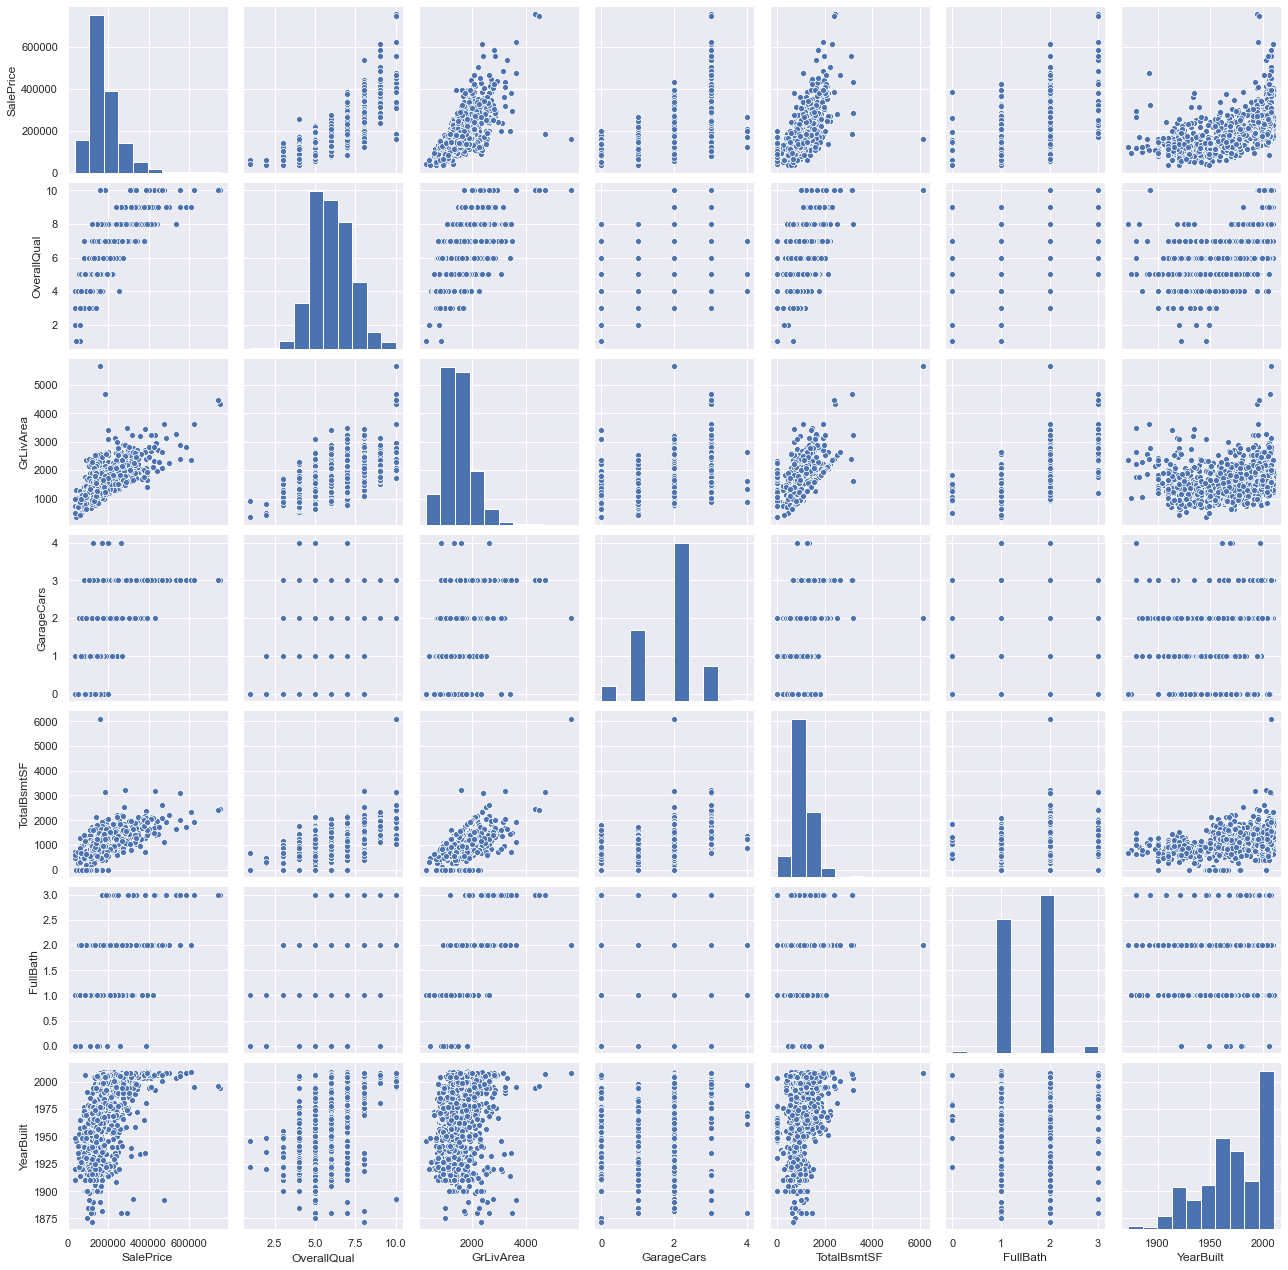

In [51]:
# scatterplot
sns.set()
cols = ['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'TotalBsmtSF', 'FullBath', 'YearBuilt']
sns.pairplot(df_train[cols], size = 2.5)
plt.show()

Although we already know some of the main figures, this mega scatter plot gives us a reasonable idea abour variables relationships.

One of the figures we may find interesting is the one between TotalBsmtSF and GrLivArea. In this figure we can see the dots drawing a linear line, which almost acts like a border. It totally makes sense that the majority of the dots stay below that line. Basement areas can be equal to the above ground living area, but it is not expected a basement area bigger than the above ground living area (unless you're tryinh to buy a bunker).

The plot concerning SalePrice and YearBuilt can also make us think. In the bottom of the dots cloud, we see what almost appears to be a shy exponential function (be creative). We can also see this same tendency in the upper limit of the dots cloud (be even more creative). Also notice how the set of dots regarding the last years tend to stay above this limit (I just wanted to say that prices are increasing faster now).

Ok, enough of Rorschach test for now. Let's move forward to what's missing:missing data!

## Missing data
Important questions when thinking about missing data:
- How prevalent is the missing data?
- Is missing data random or does it have a pattern?

The answer to these questions is important for practical reasons because missing data can imply a reduction of the sample size. This can prevent us from proceeding with the analysis. Moreover, from a substantive perspective, we need to ensure that the missing data process is not biased and hidding an inconvenient truth.

In [52]:
# missing data
total = df_train.isnull().sum().sort_values(ascending = False)
percent = (df_train.isnull().sum() / df_train.isnull().count()).sort_values(ascending = False)
missing_data = pd. concat([total, percent], axis = 1, keys = ['Total', 'Percent'])
missing_data.head(20)

,Total,Percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Let;s analyse this to understand how to handle the missing data.

We'll consider that when more than 15% of the data is missing, we should delete the corresponding variable and pretend it never existed. This means that we will not try any trick to fill the missing data in these cases. According to this, there is a set of variables (e.g. PoolQC, MiscFeature, Alley, etc) that we should delete. The point is : will we miss this data? I don't think so. None of these variables seem to be very important, since most of them are not aspects in which we think about when buying a house (maybe that's the reason why data is missing?). Moreover, looking closer at the variables, we could say that variables like PoolQC, MiscFeature and FireplaceQu are strong candidates for outliers, so we'll be happy to delete them.

In what concerns the remaining cases, we can see that GarageX variables have the same number of missing data. I bet missing data refers to the same set of observations (although I will not check it; it's just 5% and we should not spend 20 in 5 problem). Since the most important inforamtion regarding garages is expressed by GarageCars and considering that we are just talking about 5% of missing data, I'll delete the mentioned GarageX variables. The same logic applies to BsmtX variables.

Regarding MasVnrArea and MasVnrType, we can consider that these variables are not essential. Furthermore, they have a strong correlation with YearBuilt and OverallQual which are already considered. Thus, we will not lose information if we delete MasVnrArea and MasVnrType.

Finally, we have one missing obsevation in Electrical. Since it is just one observation, we'll delete this observation and keep the variable.

In summary, to handle missing data, we'll delete all the variables with missing data, except the variable Electrical. In Electrical we'll just delete the observation with missing data.

In [53]:
# dealing with missing data
df_train = df_train.drop((missing_data[missing_data['Total'] > 1]).index, 1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max() # just checking that there's no missing data missing...

0

## Outliers
Outliers is also something that we should be aware of. Why? Because outliers can markedly affect our models and can be a valuable source of information, providing us insights about specific behaviours.

Outliers is a complex subject and it deserves more attention. Here, we'll just do a quick analysis through the standard deviation of SalePrice and a set of scatter plots.

### Univariate analysis

The primary concern here is to establish a threshold that defines an observation as an outlier.To do so, we'll standardize the data. In this context, data standardization means converting data values to have mean of 0 and a standard deviation of 1.

In [54]:
# standardizing data
saleprice_scaled = StandardScaler().fit_transform(df_train['SalePrice'][:, np.newaxis])
low_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][:10]
high_range = saleprice_scaled[saleprice_scaled[:, 0].argsort()][-10:]
print('out range (low) of the distribution')
print(low_range)
print('\n out range (high) of the distribution')
print(high_range)

out range (low) of the distribution
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]

 out range (high) of the distribution
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


How SalePrice looks with her new clothes:
- Low range values are similar and not too far from 0.
- High range values are far from 0 and the 7.something values are really out of range.

For now, we'll not consider any of these values as an outlier but we should be careful with those two 7.something values

### Bivariate analysis
We already know the following scatter plots by heart. However, when we look to things from a new perspective, there's always something to discover. As Alan Kay said, a change in perspective is worth 80 IQ points.

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='GrLivArea', ylabel='SalePrice'>

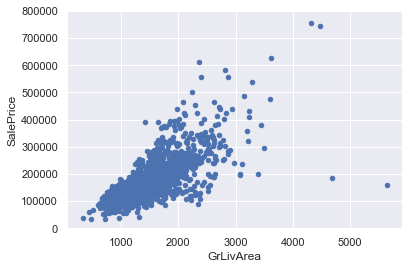

In [55]:
# bivariate analysis saleprice/grlivarea
var = 'GrLivArea'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(var, 'SalePrice', ylim = (0, 800000))

What has been revealed:
- The two values with bigger GrLivArea seem strange and they are not following the crowd. We can speculate why this is happening. Maybe they refer to agricultural area and that could explain the low price. I'm not sure about this but I'm quite confident that these two points are not representative of the typical case. Therefore, we'll define them as outliers and delete them.
- The two observations in the top of the plot are those. 7.somthing observations that we said we should be careful about. They look like two special cases, however they seem to be following the trend. For that reason, we will keep them.

In [56]:
# deleting data
df_train.sort_values(by = 'GrLivArea', ascending = False)[:2]
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='TotalBsmtSF', ylabel='SalePrice'>

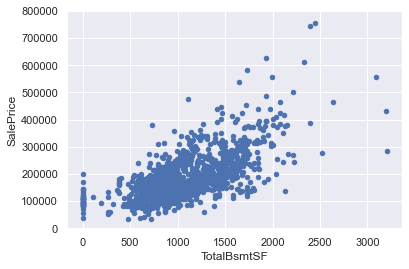

In [57]:
# bivariate analysis saleprice/grlivarea
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis = 1)
data.plot.scatter(var, 'SalePrice', ylim = (0, 800000))

We can feel tempted to eliminate some observations (e.g. TotalBsmtSF > 3000) but I suppose it's not worth it. We can live with that, so we'll not do anything.

## 5. Getting hard core
In Ayn Rand's novel, Atlas Shrugged, there is an often-repeated question: who is John Galt? A big part of the book is about the quest to discover the answer to this question.

I feel Randian now. Who is SalPrice?

The answer to this question lies in testing for the assumptions underlying the statistical bases for multivariate analysis. We already did some data cleaning and discoverd a lot about SalePrice. Now it's time to go deep and understand how SalePrice complies with the statistical assumptions that enables us to apply multivariate technuques.

According to [Hair er al. (2013)](https://www.amazon.com/Multivariate-Data-Analysis-Joseph-Hair/dp/9332536503/ref=as_sl_pc_tf_til?tag=pmarcelino-20&linkCode=w00&linkId=5e9109fa2213fef911dae80731a07a17&creativeASIN=9332536503), four assumptions should be tested:
- Normality : When we talk about normality what we mean is that the data should look like a normal distribution. This is important because several statistic tests rely on this (e.g. t-statistics). In this exercise we'll just check univariate normality for SalePrice (which is a limited approach). Remember that univariate normality doesn't ensure muntivariate normality (which is what we would like to have), but it helps. Another detail to take into account is that in big samples (> 200 observations) normality is not such an issue. However, if we solve normality, we avoid a lot of other problems (e.g. heteroscedacity) so that's the main reason why we are doing this analysis.
- Homoscedasticity (등분산성 : 잔차항의 분산이 독립변수나 예측변수의 각 관찰 값에서 동일한 값을 보이는 성질): I just hope I wrote it right. Homoscedasricity refers to the assumption that dependent variable(s) exhibit equal levels of variance across the range of predictor variable(s). Homoscedasticity is desirable because we want the error term to be the same across all values of the independent variables.
- Linearity : The most common way to assess linearity is to examine scatter plots and search for linear patterns. If patterns are not linear, it would be worthwhile to explore data transformations. However, we'll not get into this because most of the scatter plots we've seen appear to have linear relationships.
- Absence of correlated errors : Correlated errors, like the definition suggests, happen when one error is correlated to another. For instance, if one positive error makes a negative error systematically, it means that there's a relationship between these variables. This occers often in time series, where some patterns are time related. We'll also not get into this. However, if you detect something, try to add a variable that can explain the effect you're getting. That's the most common solution for correlated errors.

What do you think Elvis would say about this long explanation? A little less conversation, a little more action please? Probably... by the way, do you know what was Elvis's last great hit?

The bathroom floor.

#### In the search for normality

The point here is to test alePrice in a very lean way. We'll do this paying attention to:
- Histogram : Kurtosis and skewness.
- Normal Probability Plot : Data distribution should closely follow the diagonal that represents the normal distribution.

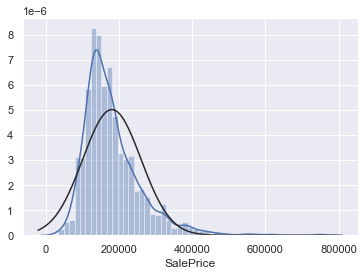

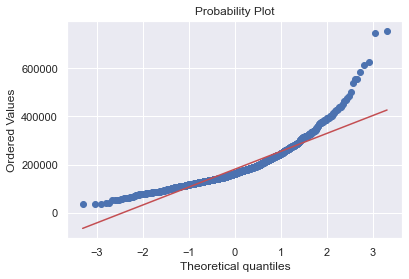

In [58]:
# histogram and normal probability plot
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['SalePrice'], plot = plt)

Ok, SalePrice is not normal. It shows peakedness, positive skewness and does not follow the diagonal line.

But everything's not lost. A simple data transformation can solve the problem. This is one of the awesome things you can learn in statistical books: in case of positive skewness, log transformations usually works well. When I discovered this, I felt like an Hogwarts' student discovering a new cool spell.

Avada kedavra!

In [59]:
# applying log stransformation
df_train['SalePrice'] = np.log(df_train['SalePrice'])

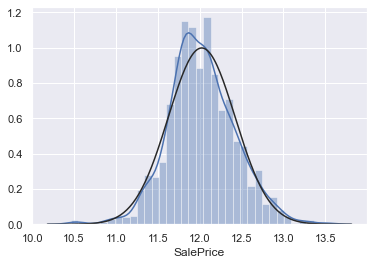

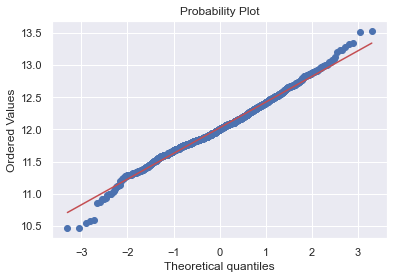

In [60]:
sns.distplot(df_train['SalePrice'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train["SalePrice"], plot = plt)

Done Let's check what's going on with GrLivArea.

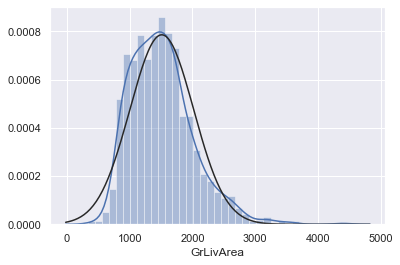

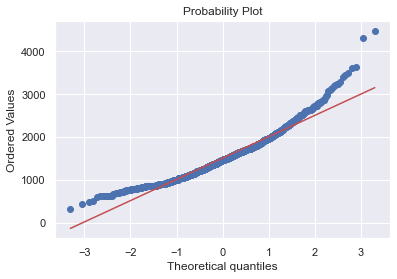

In [61]:
# histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

Tastes like skewness... Avada kedavra!

In [62]:
# data transformation
df_train['GrLivArea'] = np.log(df_train['GrLivArea'])

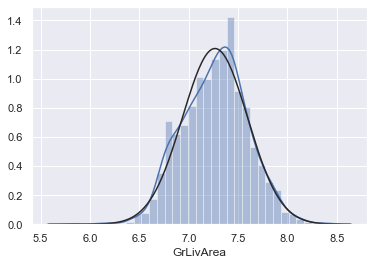

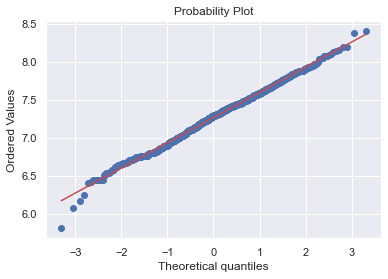

In [63]:
# transformed histogram and normal probability plot
sns.distplot(df_train['GrLivArea'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot = plt)

Next, please...

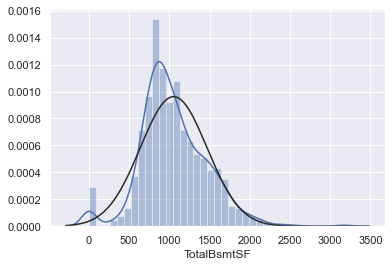

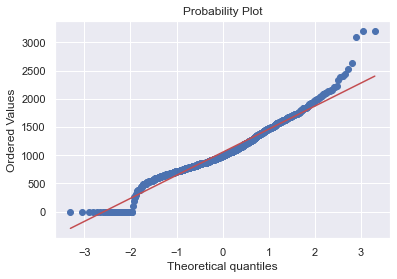

In [64]:
# histogram and normal probability plot
sns.distplot(df_train['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train['TotalBsmtSF'], plot = plt)

Ok, now we are dealing with the big boss. What do we have here?
- Something that, in general, presents skewness.
- A significant number of observations with value zero (houses without basement).
- A big problem because the value zero doesn't allow us to do log transformations.

To apply a log transformation here, we'll create a variable that can get the effect of having or not having basement (binary variable). Then, we'll do a log transformation to all the non-zero observations, ignoring those with value zero. This way we can transform data, without losing the effect of having or not basement.

I'm not sure if this approach is correct. It just seemed right to me. That's what I call high risk engineering.

In [66]:
# create column for new variable (one is enough because it's a binary categorical feature)
# if area > 0 if gets 1, for area == 0 it gets 0
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index = df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF'] > 0, 'HasBsmt'] = 1

In [67]:
# transform data
df_train.loc[df_train['HasBsmt'] == 1, 'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])

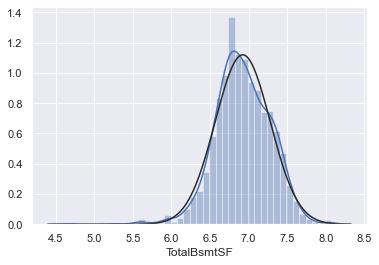

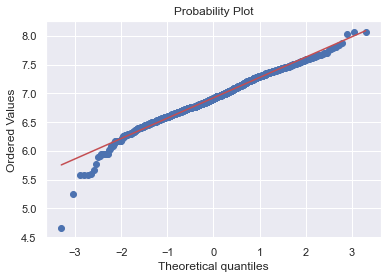

In [68]:
sns.distplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], fit = norm)
fig = plt.figure()
res = stats.probplot(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], plot = plt)

#### In the search for writing homoscedasticity right at the first attempt

The best approach to test homoscedasticity for two metric varables is graphically. Departures from an equal dispersion are shown by such shapes as cones (small dispersion at one side of the graph, large dispersion at the opposite side) or diamonds (a large number of points at the center of the distribution).

Starting by SalePrice and GrLivArea

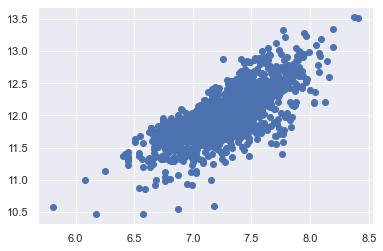

In [72]:
# scatter plot
plt.scatter(df_train['GrLivArea'], df_train['SalePrice']);

Older versions of this scatter plot (previous to log transformations), had a conic(원뿔) shape (go back and check Scatter plots between SalePrice and correlated variables (move like Jagger style)). As you can see, the current scatter plot doesn't have a conic shape anymore. That's the power of normality! Just by ensuring normality in some variables, we solved the homoscedasticity problem.

Now let's check SalePrice with TotalBsmtSF.

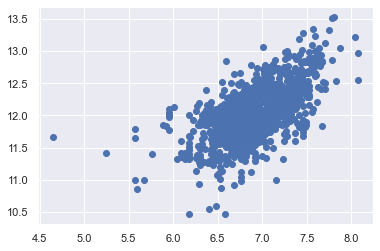

In [74]:
# wscatter plot
plt.scatter(df_train[df_train['TotalBsmtSF'] > 0]['TotalBsmtSF'], df_train[df_train['TotalBsmtSF'] > 0]['SalePrice'])

We can say that, in general, SalePrice exhibit equal levels of variance across the range of TotalBsmtSF. Cool

## Last but not the least, dummy variables

Easy mode.

In [76]:
# convert categorical variable into dummy
df_train = pd.get_dummies(df_train)

## Conclusion

That's it! We reached the end of our exercise.

Throughout this kernel we put in practice many of the strategies proposed. We philosophied about the variables, we analysed SalePrice alone and with the most correlated variables, we dealt with missing data and outliers, we tested some of the fundamental statistical assumptions and we even transformed categorical variables into dummy variables. That's a lot of work that Python helped us make easier.

But the quest is not over. Remember that our story stopped in the Facebook research. Now it's time to give a call to SalePrice and invite her to dinner. Try to predict her behaviour. Do you think she's a girl that enjoys regularized linear regression approaches? Or do you think she prefers ensemble methods? Or maybe something else?

It's up to you to find out.

# 요약

몇 가지 통계적인 지식을 바탕으로 variables를 조정해나갔다. 특히 분산과 상관관계 등을 통해서 variables engineering을 진행했다. 우선 distplot을 사용해서 numerical variable의 분산을 확인했다. 이를 통해 Skewness(왜도, 정규분포에 비해 얼마나 비대칭인지 나타내는 척도), Kurtosis(첨도, 분포의 뾰족한 정도)를 판단하고 variable을 조정했다.

### Normal distribution and correlation metric
- <b>Skewness</b> : 왜도 값이 [-2, 2] 정도의 치우쳐짐이면 왜도는 크지 않다고 판단.
    - Positive Skewness(정규분포에 비해 왼쪽으로 치우쳐짐) : np.log를 통해 데이터 값을 로그형태로 치환하면 정규분포의 형태로 바뀜.
- <b>Kurtosis</b> : 정규분포의 첨도는 0이며 0보다 큰 경우 더 뾰족한 모양을 갖는 고첨이라고 함. (뾰족한 정도에 따라 고첨 > 중첨(정규분포) > 저첨)
    - 샘플의 점수가 평균을 중심으로 가까이 몰려있으면 고첨이 됨. 즉, 분산이 작으면 집단이 동질적이고 분포의 높이가 높아짐.
    - 첨도가 큰 경우에 이상치가 많다고 판단
- <b>categorical variable vs numeric variabel</b> : numerical끼리는 scatter plot을 그리지만 categorical variable과 numerical variable은 boxplot을 통해 plot을 확인함
- <b>Correlationship</b> : heatmap을 통해 상관관계 파악 후 다중공선성 문제를 해결 및 목표변수와의 상관관계가 높은 변수를 확인
    - nlargest()함수를 사용해 corr값이 가장 높은 k개를 추출 후 heatmap 그림    

해당 notebook에서는 0의 값을 포함하는 variable의 경우 HasBsmt라는 variable을 만들어 0의 값을 가진 데이터를 제외한 나머지에 log 함수씌워 치환했음. 하지만 HasBsmt라는 함수를 굳이 만들 필요 없이 치환할 수 있기에 왜 만들었는 지 알 수 없음.(다중공선성 문제 때문에 모델을 돌릴 때 input variable로도 사용할 수 없을 것으로 보임)


### MIssing data

Missing data를 찾기 위해 total(missing data 개수), percent(missing data를 포함한 비율)를 통해 표를 만들었는데 해당 부분은 직관적으로 파악할 수 있어서 앞으로 노트북을 만들 때 참고하면 좋을 것으로 판단.
- 해당 notebook 저자는 15%이상의 missing data를 포함하고 있으면 해당 variable을 삭제하는 것을 추천함. 
- GarageX(X = Cond, Type, YrBlt ... or Qual), BsmtX(X = Exposure, FinType1 ... or Qual)의 variables은 missing data의 개수가 같다. 저자는 이에 대해 분명 같은 sets of observations에서 missing data가 발생했을 것이라 판단한다.
    - 이 variables set은 missing data가 비록 5%에 불과하지만 목표변수와의 상관관계가 더 높을 것으로 생각되는 GarageCars에는 missing data가 없기때문에 해당 변수 set을 삭제하기로 함(BsmtX 또한 마찬가지)
- MasVnrArea 등의 변수는 상관관계가 높지 않아 별로 중요하지 않은 변수로 판단, 때문에 그냥 변수를 삭제하기로 함.

<b>해당 표에서 상관관계 또한 판단하는 것을 보면 해당 표에서 '상관관계' 컬럼을 추가하는 것도 좋을 것으로 보임</b>



추정 예측의 원형이 통계(회귀분석)에서 왔다보니 기본적인 통계학적 지식이 요구되는 것으로 보임. 추정 예측을 위해 통계학적인 지식을 쌓을 필요가 있음